In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, timedelta
import matplotlib.gridspec as gridspec
import seaborn as sns
import glob
from PIL import Image
from scipy.stats import spearmanr
from scipy.stats import linregress


In [2]:
df_aps = pd.read_csv('path/') #dado de saude (entrada) 
df_aps

,municipio,co_ibge,ano,epiweek,atend_totais,atend_ivas,atend_arbov,cod_rgi,nome_rgi,co_ibge_7,uf_code,UF,longitude,latitude,pop_21,dqi
0,Alta Floresta D´oeste,110001,2017,12,615,15,0,110005,Cacoal,1100015,11,RO,-61.999824,-11.935540,22516,Apto
1,Alta Floresta D´oeste,110001,2017,15,497,13,0,110005,Cacoal,1100015,11,RO,-61.999824,-11.935540,22516,Apto
2,Alta Floresta D´oeste,110001,2018,17,338,11,0,110005,Cacoal,1100015,11,RO,-61.999824,-11.935540,22516,Apto
3,Alta Floresta D´oeste,110001,2018,23,333,12,0,110005,Cacoal,1100015,11,RO,-61.999824,-11.935540,22516,Apto
4,Alta Floresta D´oeste,110001,2018,44,601,16,0,110005,Cacoal,1100015,11,RO,-61.999824,-11.935540,22516,Apto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033045,Brasília,530010,2017,41,1764,158,3,530001,Distrito Federal,5300108,53,DF,-47.887905,-15.794087,3094325,Apto
2033046,Brasília,530010,2020,30,55599,15840,776,530001,Distrito Federal,5300108,53,DF,-47.887905,-15.794087,3094325,Apto
2033047,Brasília,530010,2021,9,62834,12589,659,530001,Distrito Federal,5300108,53,DF,-47.887905,-15.794087,3094325,Apto
2033048,Brasília,530010,2022,6,83773,28220,1503,530001,Distrito Federal,5300108,53,DF,-47.887905,-15.794087,3094325,Apto


In [17]:
#ajustando os dados de entrada para processamento 

# Suponha que df_aps já esteja definido e carregado em outra parte do seu código.
rgi_grouped = df_aps.groupby(['ano', 'epiweek', 'cod_rgi'])['atend_ivas'].sum().reset_index()
rgi = rgi_grouped.pivot_table(index=['ano', 'epiweek'], columns='cod_rgi', values='atend_ivas').reset_index()

# Adiciona uma coluna 'date' começando de 1 até o número de linhas do DataFrame.
# A coluna 'date' é baseada no reset do índice após a criação do pivot, garantindo uma sequência correta.
rgi.reset_index(drop=True, inplace=True)
rgi['date'] = range(1, len(rgi) + 1)

# Assegura que a coluna 'date' seja a primeira coluna do DataFrame.
cols = ['date'] + [col for col in rgi.columns if col != 'date']
rgi = rgi[cols]

# Remove as colunas 'ano' e 'epiweek', pois não são mais necessárias.
rgi = rgi.drop(columns=['epiweek', 'ano'])

# Renomeia as colunas para incluir o sufixo "_cases" em todas as colunas exceto 'date'.
rgi.columns = ['date' if col == 'date' else f'{col}_cases' for col in rgi.columns]

# Adiciona uma coluna 'Mobility' com um valor padrão de 1.
rgi['Mobility'] = 1

# Reordena as colunas para colocar 'Mobility' como a última coluna.
colunas_ordenadas = [c for c in rgi.columns if c != 'Mobility'] + ['Mobility']
rgi = rgi[colunas_ordenadas]

# Salva o DataFrame modificado 
rgi.to_csv('APSdadosRGI.csv', index=False)

# Exibe o DataFrame 
display(rgi)


,date,110001_cases,110002_cases,110003_cases,110004_cases,110005_cases,110006_cases,120001_cases,120002_cases,120003_cases,...,520015_cases,520016_cases,520017_cases,520018_cases,520019_cases,520020_cases,520021_cases,520022_cases,530001_cases,Mobility
0,1,224.0,240.0,26.0,102.0,115.0,102.0,279.0,145.0,128.0,...,57.0,23.0,47.0,555.0,43.0,31.0,84.0,61.0,0.0,1
1,2,306.0,216.0,20.0,128.0,185.0,115.0,314.0,141.0,170.0,...,88.0,43.0,87.0,712.0,28.0,29.0,77.0,120.0,0.0,1
2,3,243.0,189.0,17.0,133.0,160.0,98.0,298.0,123.0,112.0,...,61.0,69.0,103.0,645.0,32.0,31.0,75.0,92.0,0.0,1
3,4,188.0,190.0,18.0,129.0,184.0,65.0,294.0,126.0,120.0,...,47.0,72.0,62.0,624.0,37.0,46.0,71.0,112.0,0.0,1
4,5,275.0,175.0,37.0,138.0,176.0,80.0,326.0,174.0,166.0,...,108.0,80.0,81.0,736.0,81.0,60.0,133.0,147.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,431.0,215.0,155.0,234.0,437.0,216.0,1426.0,198.0,381.0,...,552.0,271.0,246.0,1157.0,984.0,282.0,271.0,69.0,5677.0,1
361,362,480.0,165.0,127.0,294.0,489.0,189.0,1555.0,110.0,262.0,...,543.0,259.0,296.0,1240.0,1108.0,208.0,206.0,89.0,6658.0,1
362,363,370.0,147.0,65.0,327.0,462.0,122.0,957.0,139.0,221.0,...,342.0,175.0,187.0,1013.0,1004.0,204.0,116.0,87.0,5561.0,1
363,364,470.0,67.0,114.0,189.0,480.0,143.0,2002.0,195.0,239.0,...,518.0,174.0,162.0,778.0,906.0,174.0,140.0,87.0,6366.0,1


In [4]:
# Carregamento dos dados de moblidade e ajustes para processamento 

df1 = pd.read_csv('mobilidade/lista_simetrica_rodo_510rgi.csv') # entrade de dados de transporte

# Converter todo o DataFrame para strings usando o método astype
df1 = df1.astype(str)

# Converter a coluna 'fluxo' de volta para inteiros
# Primeiro, convertemos para float para lidar com possíveis valores flutuantes formatados como string
df1['fluxo'] = df1['fluxo'].astype(float).astype(np.int64)

# Carregar o DataFrame
df2 = pd.read_csv('popRGI.csv') # entrade de dados de população
display(df2)


df2['rgi'] = df2['rgi'].astype(str)

df2['Population'] = df2['Population'].astype(int)

def Pop(rgi):
    N = df2.loc[df2['rgi'] == rgi, 'Population'].sum()
    return N

,rgi,Population,Municipios
0,110001,666953,5
1,110002,242279,8
2,110003,122216,5
3,110004,313023,13
4,110005,308988,14
...,...,...,...
505,520019,722640,6
506,520020,506355,7
507,520021,140572,14
508,520022,65161,7


In [34]:
#CODIGO PRINCIPAL

def flow(i,j):

    N=Pop(i)

    
    #somatorio dos fluxos destino e origem
    flow_t=sum(map(int,df1.loc[(df1['destino']==j)&(df1['origem']==i)].fluxo)) #fluxo trabalho estudo

    flow= np.array([(flow_t / 52)*((100 + mob[t]-1)/100) for t in range(len(mob))]) #ajusta p escala semanal 
    # fluxo total
    return flow/(N)


gamma=1/5
#g(x)
def g(x,gamma):

    return np.exp(-gamma*x)



#Integral b(t-x)g(x) dx
def Int(b,t,gamma,P=None):

    if P==None:
        P=1

    Int=0

    interval=np.arange(t+1)
    for x in interval:

        Int += b[t-x]*g(x,gamma)

    return P*Int



#sucetivel = população - soma acumulada de infectados
def S(t,i):
    return N[i]-np.cumsum(B[i])[t]

def Q(t,i):

    return B[i][t]/S(t,i)

#definiu para auxiliar na calculo de theta
def Sum_flow(i,t,Mun):

    Sum=0

    for k2 in Mun:
        if k2 != i:
            Sum += flows[i][k2][t]

    return Sum



#determina theta para qualquer municipio
def Theta(t,i,j,Mun):

    if i==j:
        Theta=(1/N[i])*(Int(B[i],t,gamma)*((1-Sum_flow(i,t,Mun))**2))

        for k in Mun:
            if k != i:
                Theta+= (1/N[i])*(Int(B[k],t,gamma)*(1-Sum_flow(i,t,Mun))*flows[k][i][t])


    else:
        Theta=(1/N[j])*(Int(B[i],t,gamma)*(flows[i][j][t]**2)+Int(B[j],t,gamma)*(1-Sum_flow(j,t,Mun))*flows[i][j][t])

        for k in Mun:
            if k != i and k !=j:
                Theta+= (1/N[j])*(flows[i][j][t]*flows[k][j][t]*Int(B[k],t,gamma))



    return Theta





#criando matriz de beta
def Beta(t,Mun):

    Thetas=[]



    for i in Mun:
        sub_th=[]
        for j in Mun:
            sub_th.append(Theta(t,i,j,Mun))

        Thetas.append(sub_th)


    Thetas=np.array(Thetas)



    Qs=np.array([Q(t,i) for i in Mun])



    Betas=np.linalg.solve(Thetas, Qs) #linalg.solve resolver a operação de theta e Q

    Betas_dic={}
    i_uf=0
    for UF in Mun:
        Betas_dic[UF]=Betas[i_uf]


        if Betas[i_uf]<0:
            print(Betas[i_uf])

        i_uf+=1

    return Betas_dic




def Lambda(t,Mun):

    Betas=Beta(t,Mun)

    Lambdas={}
    for i in Mun:
        semi_Lambdas={}
        for j in Mun:

            if i==j:

                Lambda= (Betas[i]/N[i])*((1-Sum_flow(i,t,Mun))**2)

                for k in Mun:
                    if k != i:
                        Lambda+= (Betas[k]/N[k])*(flows[i][k][t]**2)

            else:

                Lambda= (Betas[i]/N[i])*(flows[j][i][t]*(1-Sum_flow(i,t,Mun)))+ (Betas[j]/N[j])*((1-Sum_flow(j,t,Mun))*flows[i][j][t])

                for k in Mun:
                    if k!= i and k!=j:
                        Lambda+= (Betas[k]/N[k])*(flows[i][k][t]*flows[j][k][t])

            semi_Lambdas[j]=Lambda

        Lambdas[i]=semi_Lambdas

    return Lambdas

#estabele um limite de caso para contribuir no resultado
def Mun_check(t,Mun_base,B,limit):

    Mun=[]
    non_Mun=[]
    for UF in Mun_base:
        if np.cumsum(B[UF])[t] > limit:
            Mun.append(UF)
        else:
            non_Mun.append(UF)

    return Mun,non_Mun

# R(t)
def Rt(B,Mun_base,limit):

    #Defining the F matrix array

    #Data

    Rt={}

    for i in Mun_base:
        semi_Rt={}
        for j in Mun_base:
            semi_Rt[j]=[]
        Rt[i]=semi_Rt


    for UF in Mun_base:
        for UF_2 in Mun_base:
            Rt[UF][UF_2].append(np.nan)



    time= np.arange(len(B[Mun_base[0]])-1)+1

    for t in time:

        Mun,non_Mun=Mun_check(t,Mun_base,B,limit)

        for UF in Mun_base:
            for UF_2 in Mun_base:
                if (UF in non_Mun) or (UF_2 in non_Mun):
                    Rt[UF][UF_2].append(np.nan)



        if Mun != []:
            Lambdas=Lambda(t,Mun)
            for i in Mun:
                for j in Mun:
                    Rt[i][j].append(S(t,i)*Lambdas[i][j]/gamma)


        else:
            for i in Mun:
                for j in Mun:
                    Rt[i][j].append(np.nan)





    return Rt







def J(Rt_data,Mun_base):

    J={}


    for i in Mun_base:
        J_semipar={}
        for j in Mun_base:

            J_par=[]
            time= np.arange(len(B[Mun_base[0]]))
            for t in time:

                J_par.append(Rt_data[i][j][t]*Int(B[j],t,gamma,gamma))

            J_semipar[j]=J_par


        J[i]=J_semipar

    return J

In [8]:
#função para rodar codigos principais 
def Run_Net(Mun_l):

    global mob,N,B,flows


    Mun_base=Mun_l[0:]


    df=pd.read_csv('APSdadosRGI.csv') #dado gerando no inicio do programa


    dates=df.date.values


    mob=df.Mobility.values
    B={}
    flows={}
    N={}

    for UF in Mun_base:
        B[UF]=df[UF+'_cases'].values
        N[UF]=Pop(UF)

        semi_flow={}
        for UF_2 in Mun_base:
            if UF_2!=UF:
                semi_flow[UF_2]=flow(UF,UF_2)
            else:
                semi_flow[UF_2]= np.zeros(len(B[UF]))

        flows[UF]=semi_flow


    Rt_data=Rt(B,Mun_base,1) #15 é o que ?
    J_data=J(Rt_data,Mun_base)

    for UF in Mun_base:
        df_Rt = pd.DataFrame(Rt_data[UF], columns=Rt_data[UF].keys())
        df_J = pd.DataFrame(J_data[UF], columns=J_data[UF].keys())

        df_Rt.insert(0, "date", dates, True)
        df_J.insert(0, "date", dates, True)

        df_Rt.to_csv('/path/RT_' + UF + ".csv", index = False)
        df_J.to_csv( '/path/J_' + UF + ".csv", index = False)

In [6]:
# Obter todas as regiões únicas no dataframe

# 120001  # Rio Branco, Acre
# 270001  # Maceió, Alagoas
# 160001  # Macapá, Amapá
# 130001  # Manaus, Amazonas
# 290001  # Salvador, Bahia
# 230001  # Fortaleza, Ceará
# 530001  # Brasília, Distrito Federal
# 320001  # Vitória, Espírito Santo
# 520001  # Goiânia, Goiás
# 210001  # São Luís, Maranhão
# 510001  # Cuiabá, Mato Grosso
# 500001  # Campo Grande, Mato Grosso do Sul
# 310001  # Belo Horizonte, Minas Gerais
# 150001  # Belém, Pará
# 250001  # João Pessoa, Paraíba
# 410001  # Curitiba, Paraná
# 260001  # Recife, Pernambuco
# 220001  # Teresina, Piauí
# 330001  # Rio de Janeiro, Rio de Janeiro
# 240001  # Natal, Rio Grande do Norte
# 430001  # Porto Alegre, Rio Grande do Sul
# 110001  # Porto Velho, Rondônia
# 140001  # Boa Vista, Roraima
# 420001  # Florianópolis, Santa Catarina
# 350001  # São Paulo, São Paulo
# 280001  # Aracaju, Sergipe
# 170001  # Palmas, Tocantins


In [8]:
#listas 
 
list_rgi_BA = sorted(['290001', '290002', '290003', '290004', '290005', '290006', '290007', '290008', '290009', '290010', '290011',
                      '290012', '290013', '290014', '290015', '290016', '290017', '290018', '290019', '290020', '290021', '290022',
                      '290023', '290024', '290025', '290026', '290027', '290028', '290029', '290030', '290031', '290032', '290033', '290034'])

list_c1_BA = sorted(['290001', '290033', '290025', '290029', '290027', '290002','290032', '290023', 
                    '290030', '290028', '290026', '290022'])

list_c2_BA = sorted(['290003', '290004', '290012', '290014', '290005', '290006','290007', 
                    '290008', '290009', '290010'])

list_c3_BA = sorted(['290011', '290013', '290016', '290017', '290018', '290034','290021', '290020', 
                    '290031', '290015', '290019'])



In [9]:
%%time
# Função roda para executar o progrma 

Run_Net(list_rgi_BA) #executa lista especifica

-0.00039825787299986175
-0.00042807309338040416
-0.0013802715100741953
-0.00450475622093483
-0.00019807954382372454
-0.00044445597817922833
-0.00026231378626827214
-0.0013850178599394236
-0.00034081927938157307
-0.00063391259301905
-0.0004191411505909597
-0.002170077650948092
-0.00015757402346830253
-0.0001995832873755274
-0.00033191956609313983
-0.0001568058804185846
-0.0001570498801290079
-0.0023389630849503934
-0.001032255395145992
-0.0015259465003078687
CPU times: user 1h 1min 2s, sys: 4min 39s, total: 1h 5min 41s
Wall time: 54min 27s


# Processamenteo dos resultados
> processo de analises e vizualizações


In [3]:
#matriz de espalhamento 

import numpy as np
import pandas as pd
import glob
### faz o calculo usando casos como fator de normalização 
df = pd.read_csv('APSdadosRGI.csv')

path = 'J02_34rgiBA/'
files = glob.glob(path + 'J_*.csv')

# Cria um dicionário para armazenar os resultados
J_m = {}

# Itera sobre cada código de município (j)
for j in list_c2_BA: ### MUDAR LISTA (c1, c2, c3)
    J_list = []
    
    # Itera sobre cada município (i) 
    for i in list_c2_BA:   ### MUDAR LISTA (c1, c2, c3)
        # Carrega o arquivo correspondente ao município i
        file = next((f for f in files if 'J_' + str(i) in f), None)
        if file:
            B = df[str(i) + '_cases'].values  # Carrega os casos para o município i
            df_J = pd.read_csv(file)     # Carrega o arquivo de interação J_ij
            J_ij = df_J[str(j)].values   # Seleciona a coluna correspondente ao código j
            
            # Remove valores NaN de J_ij
            J_ij_n = J_ij[~np.isnan(J_ij)]
            
            # Verificação antes da divisão
            if len(J_ij_n) == 0:
                print(f"J_ij_n vazio para o município {i} com código {j}")
                J_list.append(np.nan)
            else:
                valid_B = B[len(J_ij) - len(J_ij_n):]
                non_zero_indices = valid_B != 0
                
                if np.any(non_zero_indices):
                    valid_ratio = J_ij_n[non_zero_indices] / valid_B[non_zero_indices]
                    J_list.append(100 * np.mean(valid_ratio))
                else:
                    print(f"Divisão por zero em B para o município {i} com código {j}")
                    J_list.append(np.nan)
    
    # Atualiza o dicionário com o código do município j como chave
    J_m[j] = J_list

# Cria um DataFrame pandas a partir do dicionário de resultados
df_m = pd.DataFrame.from_dict(J_m)

# Transpõe o DataFrame para ter os códigos como índices
df_m['Code'] = list(df_m.columns)
df_m.set_index('Code', inplace=True)

# Normaliza as linhas para somar 100% (se necessário)
soma_linha = df_m.sum(axis=1)
df_norm = df_m.div(soma_linha, axis=0) * 100

# Substituir NaN por 0
df_norm = df_norm.fillna(0)

# Formatar para duas casas decimais
df_norm = df_norm.round(2)

# Exibe o DataFrame formatado
display(df_norm)

# Salva o DataFrame em um arquivo CSV
df_norm.to_csv(f'matriz_J_semana_BA_c2.csv')


,290003,290004,290005,290006,290007,290008,290009,290010,290012,290014
Code,,,,,,,,,,
290003,95.08,1.26,0.35,0.52,0.20,0.08,0.07,0.08,1.89,0.46
290004,4.48,90.01,1.83,0.30,0.49,0.11,0.11,0.08,1.25,1.33
290005,0.83,1.22,92.12,1.75,1.14,0.04,0.20,0.20,0.52,1.98
290006,1.90,0.30,2.67,93.94,0.48,0.00,0.08,0.04,0.32,0.26
290007,0.25,0.17,0.61,0.17,94.75,0.40,0.48,1.24,0.42,1.51
290008,0.03,0.01,0.01,0.00,0.10,99.24,0.39,0.18,0.00,0.04
290009,0.09,0.03,0.09,0.03,0.45,1.36,96.70,0.99,0.06,0.21
290010,0.05,0.01,0.05,0.01,0.59,0.35,0.50,97.96,0.11,0.38
290012,2.42,0.44,0.28,0.11,0.42,0.00,0.07,0.23,93.89,2.13


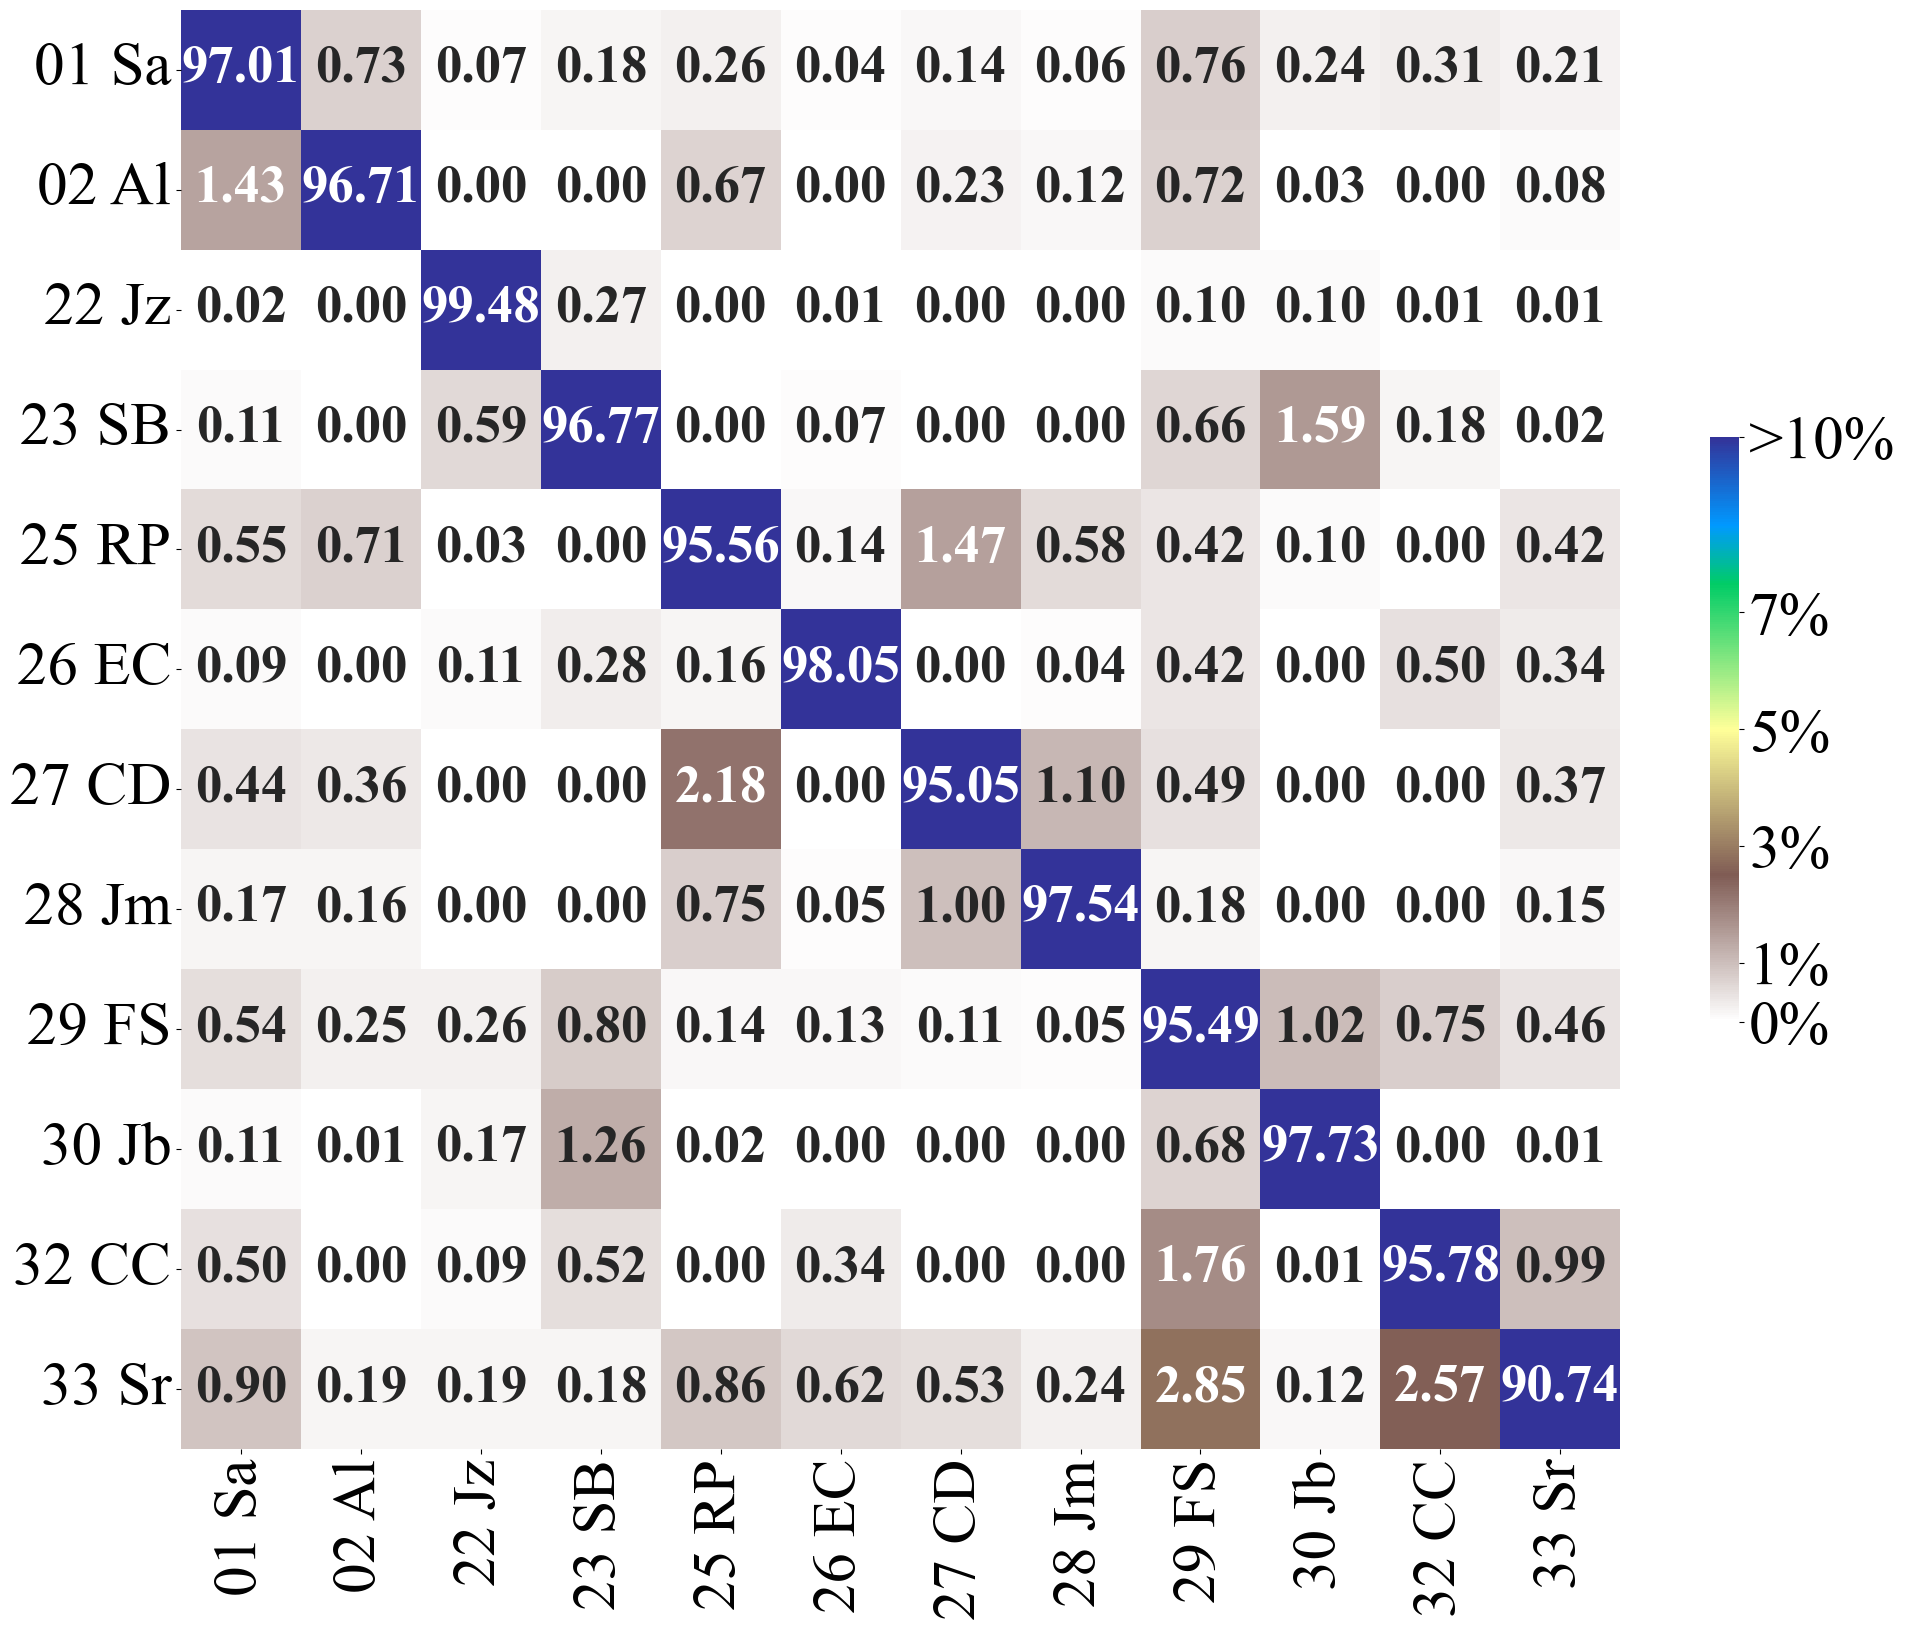

In [28]:
# Carregar o arquivo CSV para um DataFrame

plt.rcParams['font.family'] = 'Times New Roman'
df = pd.read_csv('c1_Ba/matriz_J_semana_rodo_BAc1.csv')
df.set_index(df.columns[0], inplace=True)

#display(df)


# Dicionário para mapear códigos para nomes de regiões imediatas
codigos_regioes_imediatas = {
    290001: "Salvador (1)",
    290002: "Alagoinhas (2)",
    290003: "Santo Antônio de Jesus (3) ",
    290004: "Cruz das Almas (4)",
    290005: "Valença (5)",
    290006: "Nazaré – Maragogipe (6)",
    290007: "Ilhéus – Itabuna (7)",
    290008: "Teixeira de Freitas(8)",
    290009: "Eunápolis - Porto Seguro(9)",
    290010: "Camacan(10)",
    290011: "Vitória da Conquista(11)",
    290012: "Jequié (12)",
    290013: "Brumado (13)",
    290014: "Ipiaú (14)",
    290015: "Itapetinga (15)",
    290016: "Guanambi (16)",
    290017: "Bom Jesus da Lapa (17)",
    290018: "Barreiras (18)",
    290019: "Santa Maria da Vitoria (19)",
    290020: "Irecê (20)",
    290021: "Xique-Xique – Barra (21)",
    290022: "Juazeiro (22)",
    290023: "Senhor do Bonfim (23)",
    290024: "Paulo Afonso (24)",
    290025: "Ribeira do Pombal (25)",
    290026: "Euclides da Cunha (26)",
    290027: "Cícero Dantas (27)",
    290028: "Jeremoabo (28)",
    290029: "Feira de Santana (29)",
    290030: "Jacobina (30)",
    290031: "Itaberaba (31)",
    290032: "Conceição do Coité (32)",
    290033: "Serrinha (33)",
    290034: "Seabra (34)"
}

codigos_regioes_imediatas_abr = {
    290001: "01 Sa",
    290002: "02 Al",
    290003: "03 SJ ",
    290004: "04 CA",
    290005: "05 Vç",
    290006: "06 N-M",
    290007: "07 I-I",
    290008: "08 TF",
    290009: "09 E-P",
    290010: "10 Cn",
    290011: "11 VC",
    290012: "12 Jq",
    290013: "13 Bd",
    290014: "14 Ip",
    290015: "15 Ig",
    290016: "16 Gb",
    290017: "17 BJ",
    290018: "18 Br",
    290019: "19 SM",
    290020: "20 Ic",
    290021: "21 X-B",
    290022: "22 Jz",
    290023: "23 SB",
    290024: "24 PA",
    290025: "25 RP",
    290026: "26 EC",
    290027: "27 CD",
    290028: "28 Jm",
    290029: "29 FS",
    290030: "30 Jb",
    290031: "31 Ib",
    290032: "32 CC",
    290033: "33 Sr",
    290034: "34 Sb"
}

# Mapear índices e colunas para nomes usando o dicionário
#df.index = [codigos_regioes_imediatas.get(int(idx), idx) for idx in df.index]
#df.columns = [codigos_regioes_imediatas.get(int(col), col) for col in df.columns]
df.index = [codigos_regioes_imediatas_abr.get(int(idx), idx) for idx in df.index]
df.columns = [codigos_regioes_imediatas_abr.get(int(col), col) for col in df.columns]


# Calcular o módulo dos valores do DataFrame
df = df.abs()

# Definir o tamanho e layout do plot
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(nrows=1, ncols=1)
ax1 = plt.subplot(gs[0, 0])

# Criar o heatmap
h1 = sns.heatmap(df, cmap='terrain_r', annot=True, fmt=".2f",
                 annot_kws={'size': 38, 'weight': 'bold'}, cbar=True, square=True,
                 cbar_kws={"shrink": 0.3}, vmin=0, vmax=10, ax=ax1)

# Configurar o colorbar
#cbar = h1.collections[0].colorbar
#cbar.set_ticks([0, 10, 40, 80, 100])
#cbar.set_ticklabels(['0%', '10%', '40%', '80%', '100%'])

# Configurar o colorbar
cbar = h1.collections[0].colorbar
cbar.set_ticks([0,1,3,5,7, 10 ])
cbar.set_ticklabels(['0%', '1%', '3%', '5%','7%', '>10%'])

# Configurar parâmetros dos eixos e labels
ax1.tick_params(labelsize=44)
cbar.ax.tick_params(labelsize=44)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)

#ax1.set_ylabel('Matriz de Espalhamento com Fluxo Rodoviário Semanal', fontsize=22)

# Ajustar layout
plt.tight_layout()

# Salvar e mostrar o plot
plt.savefig("c1_Ba/M_J%C1.png")
plt.show()


In [6]:
## matriz de espalhamento em numeros interos 

import numpy as np
import pandas as pd
import glob
import os

# Carrega os dados
path = 'c3_Ba/'
files = glob.glob(os.path.join(path, 'J_*.csv'))

# Lista de municípios (deve ser definida antes)
list_rgi_BA = sorted([int(os.path.basename(f).split('_')[1].split('.')[0]) for f in files if os.path.basename(f).split('_')[1].split('.')[0].isdigit()])

# Dicionário para armazenar os resultados
J_m = {}

# Itera sobre cada código de município em list_c2_BA
for j in list_c3_BA:
    J_list = []
    
    for i in list_c3_BA:
        # Verifica se o arquivo correspondente existe
        file = next((f for f in files if f'J_{i}.csv' in f), None)
        if file is None:
            print(f"Arquivo J_{i}.csv não encontrado. Pulando...")
            J_list.append(np.nan)
            continue
        
        # Carrega os dados
        df_J = pd.read_csv(file)
        
        # Verifica se a coluna j está presente
        if str(j) not in df_J.columns:
            print(f"Coluna {j} ausente no arquivo {file}. Pulando...")
            J_list.append(np.nan)
            continue
        
        # Obtém os valores de J_ij
        J_ij = pd.to_numeric(df_J[str(j)], errors='coerce').dropna().values
        
        if len(J_ij) == 0:
            print(f"J_ij vazio para o município {i} com código {j}")
            J_list.append(np.nan)
        else:
            J_list.append(int(round(np.mean(J_ij))))
    
    # Atualiza o dicionário com o código do município j como chave
    J_m[j] = J_list

# Cria o DataFrame com os resultados
df_m = pd.DataFrame.from_dict(J_m, orient='index', columns=list_c3_BA)
df_m = df_m.reindex(sorted(df_m.index))  # Ordena as linhas

df_m.fillna(0, inplace=True)  # Substituir NaN por 0
df_m = df_m.astype(int)  # Converter os valores para inteiros
np.fill_diagonal(df_m.values, 0)

# Salva o DataFrame final
df_m.to_csv(os.path.join(path,'matriz_J_semana_BA_c3.csv'))

# Exibir o DataFrame
display(df_m)

,290011,290013,290015,290016,290017,290018,290019,290020,290021,290031,290034
290011,0,3,4,3,1,1,0,0,0,1,1
290013,7,0,3,7,4,3,0,0,2,0,2
290015,2,1,0,0,0,0,0,0,0,0,0
290016,3,3,1,0,3,0,1,0,0,0,0
290017,1,1,0,2,0,1,1,0,1,0,0
290018,0,1,0,0,1,0,1,1,2,1,1
290019,0,0,0,1,1,2,0,0,0,0,0
290020,0,0,0,0,0,2,0,0,1,1,2
290021,0,1,0,0,1,3,0,1,0,0,1
290031,1,0,0,0,0,1,0,0,0,0,2
